In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('Trump/Tweets/trump_tweets_jan.csv',lineterminator='\n')
df2 = pd.read_csv('Trump/Tweets/trump_tweets_feb.csv',lineterminator='\n')
df3 = pd.read_csv('Trump/Tweets/trump_tweets_march.csv',lineterminator='\n')
df4 = pd.read_csv('Trump/Tweets/trump_tweets_april.csv',lineterminator='\n')
df5 = pd.read_csv('Republican/Tweets/rep_tweets_jan.csv',lineterminator='\n')
df5 = pd.read_csv('Republican/Tweets/rep_tweets_feb.csv',lineterminator='\n')
df6 = pd.read_csv('Republican/Tweets/rep_tweets_march.csv',lineterminator='\n')
df7 = pd.read_csv('Republican/Tweets/rep_tweets_april.csv',lineterminator='\n')
df8 = pd.read_csv('Republican/Tweets/rep_tweets_may.csv',lineterminator='\n')
df9 = pd.read_csv('Republican/Tweets/rep_tweets_june.csv',lineterminator='\n')
df10 = pd.read_csv('Republican/Tweets/rep_tweets_july.csv',lineterminator='\n')
df11 = pd.read_csv('Republican/Tweets/rep_tweets_aug.csv',lineterminator='\n')
df12 = pd.read_csv('Republican/Tweets/rep_tweets_sep.csv',lineterminator='\n')
df13 = pd.read_csv('Republican/Tweets/rep_tweets_oct.csv',lineterminator='\n')


In [3]:
df_total = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13])
df_total.shape

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(3031918, 8)

In [4]:
Corpus = df_total.copy()
print('I collected {} tweets.'.format(len(Corpus)))

I collected 3031918 tweets.


### Data Processing

#### Converting to lowercase

In [5]:
#converting all data to lowercase
df_total['lowercase']=df_total['tweet'].apply(lambda x: " ".join(word.lower() for word in x.split()))
df_total.head()

,Unnamed: 0,coordinates,date,location,place,screen_name,tweet,tweet_id,lowercase
0,0.0,NaN,2020-01-13 23:59:43,NaN,NaN,Lyngvie1,"As usual, trump is totally wrong.\n\n#trump’s ...",1.2168724838669804e+18,"as usual, trump is totally wrong. #trump’s fri..."
1,1.0,NaN,2020-01-13 23:54:27,NaN,NaN,NKossovan,@globalnews Here the logic of accusing #Trump ...,1.2168711617802609e+18,@globalnews here the logic of accusing #trump ...
2,2.0,NaN,2020-01-13 23:57:19,NaN,NaN,blondefrog123,@hrtablaze @Steelelwalker Next Stop: Donald #...,1.216871879148888e+18,@hrtablaze @steelelwalker next stop: donald #t...
3,3.0,NaN,2020-01-13 23:57:18,NaN,NaN,news_mideast,US to Work With Iraq on Possible Troop Reducti...,1.2168718777690726e+18,us to work with iraq on possible troop reducti...
4,4.0,NaN,2020-01-13 23:59:38,NaN,NaN,Ninavictoria_10,#Trump is so dam immature. And very unfit to b...,1.2168724634489938e+18,#trump is so dam immature. and very unfit to b...


In [6]:
df_total['punctuation']=df_total['lowercase'].str.replace('[^\w\s]','')
df_total.head()

,Unnamed: 0,coordinates,date,location,place,screen_name,tweet,tweet_id,lowercase,punctuation
0,0.0,NaN,2020-01-13 23:59:43,NaN,NaN,Lyngvie1,"As usual, trump is totally wrong.\n\n#trump’s ...",1.2168724838669804e+18,"as usual, trump is totally wrong. #trump’s fri...",as usual trump is totally wrong trumps frighte...
1,1.0,NaN,2020-01-13 23:54:27,NaN,NaN,NKossovan,@globalnews Here the logic of accusing #Trump ...,1.2168711617802609e+18,@globalnews here the logic of accusing #trump ...,globalnews here the logic of accusing trump fo...
2,2.0,NaN,2020-01-13 23:57:19,NaN,NaN,blondefrog123,@hrtablaze @Steelelwalker Next Stop: Donald #...,1.216871879148888e+18,@hrtablaze @steelelwalker next stop: donald #t...,hrtablaze steelelwalker next stop donald trump...
3,3.0,NaN,2020-01-13 23:57:18,NaN,NaN,news_mideast,US to Work With Iraq on Possible Troop Reducti...,1.2168718777690726e+18,us to work with iraq on possible troop reducti...,us to work with iraq on possible troop reducti...
4,4.0,NaN,2020-01-13 23:59:38,NaN,NaN,Ninavictoria_10,#Trump is so dam immature. And very unfit to b...,1.2168724634489938e+18,#trump is so dam immature. and very unfit to b...,trump is so dam immature and very unfit to be ...


#### Removing Stopwords

In [7]:
stop_words=stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [8]:
df_total['stopwords']=df_total['punctuation'].apply(lambda x: " ".join(word for word in x.split()if word not in stop_words))
df_total.head()

,Unnamed: 0,coordinates,date,location,place,screen_name,tweet,tweet_id,lowercase,punctuation,stopwords
0,0.0,NaN,2020-01-13 23:59:43,NaN,NaN,Lyngvie1,"As usual, trump is totally wrong.\n\n#trump’s ...",1.2168724838669804e+18,"as usual, trump is totally wrong. #trump’s fri...",as usual trump is totally wrong trumps frighte...,usual trump totally wrong trumps frightening v...
1,1.0,NaN,2020-01-13 23:54:27,NaN,NaN,NKossovan,@globalnews Here the logic of accusing #Trump ...,1.2168711617802609e+18,@globalnews here the logic of accusing #trump ...,globalnews here the logic of accusing trump fo...,globalnews logic accusing trump iranplaneshoot...
2,2.0,NaN,2020-01-13 23:57:19,NaN,NaN,blondefrog123,@hrtablaze @Steelelwalker Next Stop: Donald #...,1.216871879148888e+18,@hrtablaze @steelelwalker next stop: donald #t...,hrtablaze steelelwalker next stop donald trump...,hrtablaze steelelwalker next stop donald trump...
3,3.0,NaN,2020-01-13 23:57:18,NaN,NaN,news_mideast,US to Work With Iraq on Possible Troop Reducti...,1.2168718777690726e+18,us to work with iraq on possible troop reducti...,us to work with iraq on possible troop reducti...,us work iraq possible troop reduction usa trum...
4,4.0,NaN,2020-01-13 23:59:38,NaN,NaN,Ninavictoria_10,#Trump is so dam immature. And very unfit to b...,1.2168724634489938e+18,#trump is so dam immature. and very unfit to b...,trump is so dam immature and very unfit to be ...,trump dam immature unfit president country ame...


#### Lemmatization

In [9]:
#import Textblob
from textblob import TextBlob 
from textblob import Word

In [10]:
df_total['lemmatize']=df_total['stopwords'].apply(lambda x:" ".join(Word(word).lemmatize() for word in x.split()))

In [11]:
df_total['polarity']=df_total['lemmatize'].apply(lambda x: TextBlob(x).sentiment[0])## just got polarity

In [12]:
#df_total['subjectivity']=df_total['lemmatize'].apply(lambda x: TextBlob(x).sentiment[1])## just got polarity

In [13]:
df_total.head()

,Unnamed: 0,coordinates,date,location,place,screen_name,tweet,tweet_id,lowercase,punctuation,stopwords,lemmatize,polarity
0,0.0,NaN,2020-01-13 23:59:43,NaN,NaN,Lyngvie1,"As usual, trump is totally wrong.\n\n#trump’s ...",1.2168724838669804e+18,"as usual, trump is totally wrong. #trump’s fri...",as usual trump is totally wrong trumps frighte...,usual trump totally wrong trumps frightening v...,usual trump totally wrong trump frightening vi...,0.03
1,1.0,NaN,2020-01-13 23:54:27,NaN,NaN,NKossovan,@globalnews Here the logic of accusing #Trump ...,1.2168711617802609e+18,@globalnews here the logic of accusing #trump ...,globalnews here the logic of accusing trump fo...,globalnews logic accusing trump iranplaneshoot...,globalnews logic accusing trump iranplaneshoot...,0.00
2,2.0,NaN,2020-01-13 23:57:19,NaN,NaN,blondefrog123,@hrtablaze @Steelelwalker Next Stop: Donald #...,1.216871879148888e+18,@hrtablaze @steelelwalker next stop: donald #t...,hrtablaze steelelwalker next stop donald trump...,hrtablaze steelelwalker next stop donald trump...,hrtablaze steelelwalker next stop donald trump...,0.00
3,3.0,NaN,2020-01-13 23:57:18,NaN,NaN,news_mideast,US to Work With Iraq on Possible Troop Reducti...,1.2168718777690726e+18,us to work with iraq on possible troop reducti...,us to work with iraq on possible troop reducti...,us work iraq possible troop reduction usa trum...,u work iraq possible troop reduction usa trump...,0.00
4,4.0,NaN,2020-01-13 23:59:38,NaN,NaN,Ninavictoria_10,#Trump is so dam immature. And very unfit to b...,1.2168724634489938e+18,#trump is so dam immature. and very unfit to b...,trump is so dam immature and very unfit to be ...,trump dam immature unfit president country ame...,trump dam immature unfit president country ame...,0.00


### Tweets for Trump with sentiments (-1 = negative, +1 = posiitive, 0 = neutral)

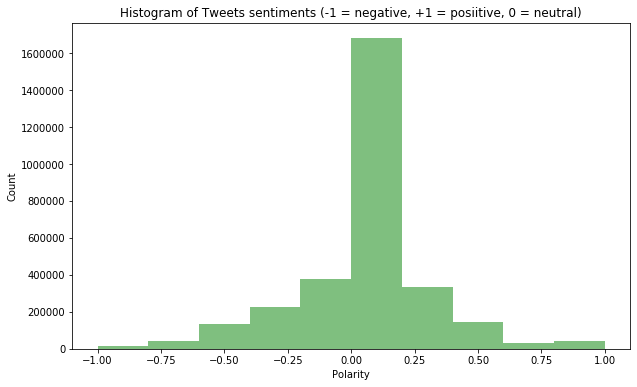

In [14]:
num_bins = 10
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df_total.polarity, num_bins, facecolor='green', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of Tweets sentiments (-1 = negative, +1 = posiitive, 0 = neutral)')
plt.show();

In [16]:
import seaborn as sns

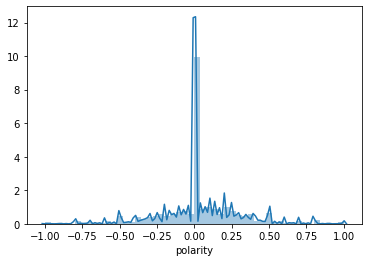

In [19]:
sns.distplot(df_total['polarity'])

In [22]:
data = df_total.dropna()
print('Total Number of Unique Locations Tweeting :',len(data['location'].unique()))

Total Number of Unique Locations Tweeting : 238


#### Top 20 Locations Tweeting about Trump

In [23]:
top20 = data['location'].value_counts()
top20 = top20[0:20]
top20 = top20.to_frame().reset_index()
top20.rename(columns = {'index':'location','location':'counts'}, inplace = True) 

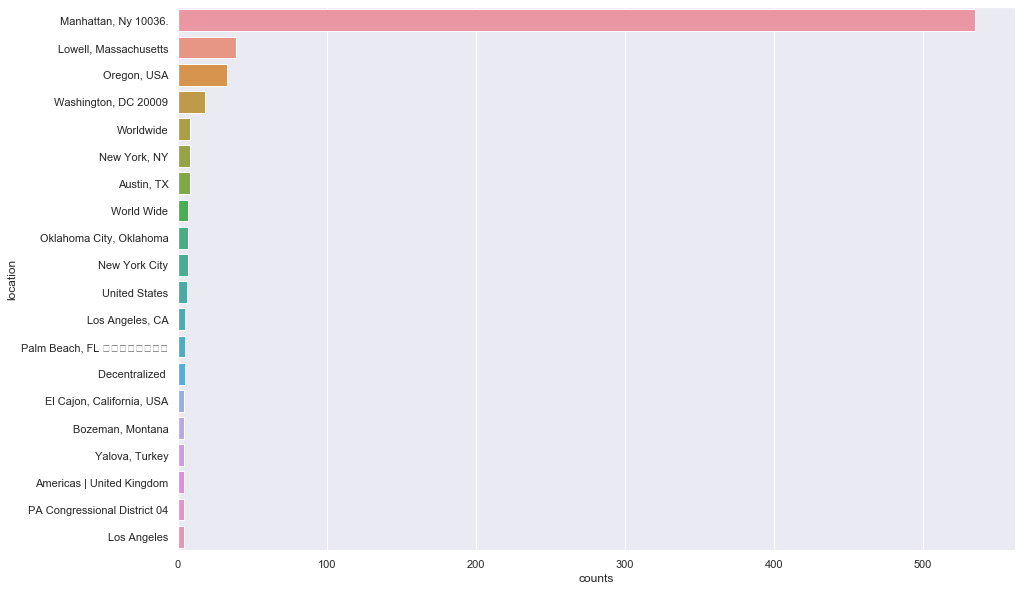

In [24]:
sns.barplot(y="location", x="counts", data=top20)
sns.set(rc={'figure.figsize':(15,10)})

In [25]:
neg_tweets = data[data['polarity']>0]
neg_tweets = neg_tweets.sort_values(by='polarity', ascending=False)
neg_tweets['location'][:10]

252800           Botswana/Gaborone
203490               New York City
345653    ÜT: 39.779085,-89.704634
268211              Cordova TN USA
244349                Georgia, USA
25267              Cobb County, GA
48938                  Seattle, WA
217680              Gettysburg, PA
23140            Seat Pleasant, MD
79217            Seat Pleasant, MD
Name: location, dtype: object

In [26]:
pos_tweets = data[data['polarity']<0]
pos_tweets = pos_tweets.sort_values(by='polarity', ascending=False)
pos_tweets['location'][:10]

172913         Vancouver Washington
383484    El Cajon, California, USA
177021        Lowell, Massachusetts
47601          Palm Harbor, Florida
103680         Palm Harbor, Florida
309503           Liverpool, England
65101        ÜT: 52.447946,4.635865
382402           Salt Lake City, UT
87220         Lowell, Massachusetts
44116          Leslieville, Toronto
Name: location, dtype: object

### Geolocation - not used

In [48]:
import geopandas as gpd

In [54]:
coord = pd.notnull(df_total["coordinates"])

In [61]:
coord = df_total.loc[df_total['coordinates'].notnull()]

In [74]:
usa = gpd.read_file('states2/States_shapefile.shp')
usa.head()

,FID,Program,State_Code,State_Name,Flowing_St,FID_1,geometry
0,1,PERMIT TRACKING,AL,ALABAMA,F,919,"POLYGON ((-85.07007 31.98070, -85.11515 31.907..."
1,2,None,AK,ALASKA,N,920,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824..."
2,3,AZURITE,AZ,ARIZONA,F,921,"POLYGON ((-114.52063 33.02771, -114.55909 33.0..."
3,4,PDS,AR,ARKANSAS,F,922,"POLYGON ((-94.46169 34.19677, -94.45262 34.508..."
4,5,None,CA,CALIFORNIA,N,923,"MULTIPOLYGON (((-121.66522 38.16929, -121.7823..."


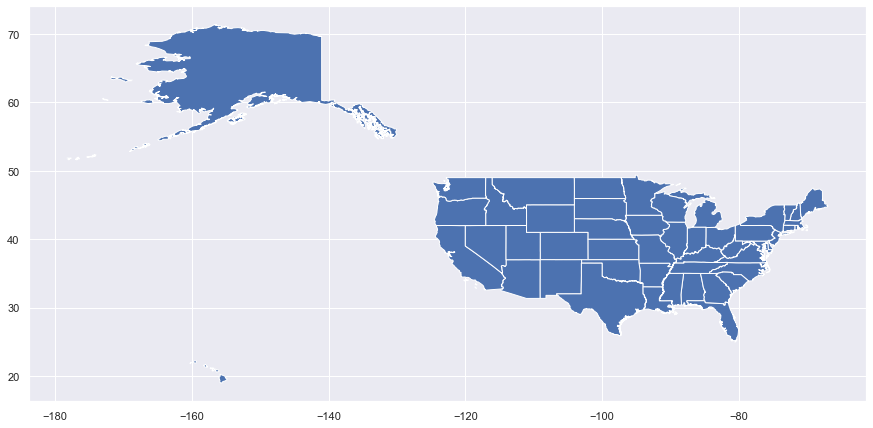

In [76]:
usa.plot()

In [94]:
loc =df_total['coordinates']

In [95]:
cleanloc = [x for x in loc if str(x) != 'nan']

In [92]:
cleanloc = [x for x in loc if str(x) != 'coordinates']

In [101]:
coord = df_total['coordinates'].value_counts().index

In [102]:
coord

Index(['coordinates', '{'type': 'Point', 'coordinates': [-118.2445, 34.0564]}',
       '{'type': 'Point', 'coordinates': [-84.3889, 33.7566]}',
       '{'type': 'Point', 'coordinates': [-77.0367, 38.8951]}',
       '{'type': 'Point', 'coordinates': [-118.3136344, 34.09073173]}',
       '{'type': 'Point', 'coordinates': [-74.0064, 40.7142]}',
       '{'type': 'Point', 'coordinates': [-81.9742, 27.8989]}',
       '{'type': 'Point', 'coordinates': [-115.149, 36.1675]}',
       '{'type': 'Point', 'coordinates': [-82.4558, 27.9473]}',
       '{'type': 'Point', 'coordinates': [-98.5, 29.4167]}',
       ...
       '{'type': 'Point', 'coordinates': [-89.9899, 34.9576]}',
       '{'type': 'Point', 'coordinates': [-87.62558788, 41.88832518]}',
       '{'type': 'Point', 'coordinates': [-85.8524, 41.238]}',
       '{'type': 'Point', 'coordinates': [-95.5741171, 29.71171171]}',
       '{'type': 'Point', 'coordinates': [-122.577452, 45.520335]}',
       '{'type': 'Point', 'coordinates': [-115.081012